In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Color checker GT

Text(0.5, 0, 'wavelength [nm]')

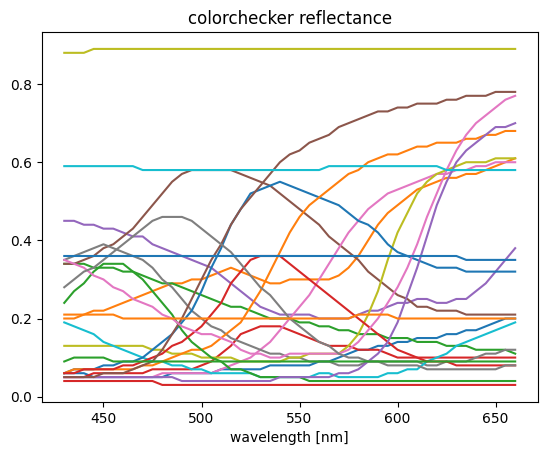

In [33]:
# Replace 'file.csv' with the path to your CSV file
file_path = '../dataset/MacbethColorChecker.csv'
# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path, header=None, skiprows=2)

# Display the DataFrame
wvls_CC = df.values[1:,0]
wvls_CC = [float(x) for x in wvls_CC] 
ref_CC = df.values[1:,1:-2]

ind_min = 6
ind_max = 61
wvls_CC = wvls_CC[ind_min:ind_max][4:-4]
ref_CC = ref_CC[ind_min:ind_max,:][4:-4]

plt.figure()
plt.plot(wvls_CC, ref_CC)
plt.title('colorchecker reflectance')
plt.xlabel('wavelength [nm]')

### Arguments

In [34]:
cam_H, cam_W = 580, 890
new_wvls = np.arange(430, 661, 5)

### Load Hyperspectral data

In [35]:
opt_param = np.load('../opt_param.npy').reshape(cam_H, cam_W, len(new_wvls))

# x, y axis
obj_pts = np.array([[310, 470], [297, 376], [637, 348], [409,356]]) # teddy bear final scene

# obj_pts = np.array([[731,106],[665,77],[630,96],[454,200],[410,500],[316,25]]) 
# obj_pts = np.array([[316-10+j,25-10+k] for j in range(20) for k in range(20)])
# obj_pts = np.array([[454,200],[359,128],[268,107],[198,85],[210,215],[325,10]]) # flower scene

# obj_pts = np.array([[731,106],[673,73],[630,96],[458,196],[410,500],[318,33]]) # pencil & flower scene final

# tree
# obj_pts = np.array([[251,132],[769,162]]) # tree # 251 132 # 270 117

# obj_pts = np.array([[244-10+j,110-10+k] for j in range(20) for k in range(20)])

### Load Spectro-radiometer captured data

In [75]:
# Replace 'file.csv' with the path to your CSV file
wvl = np.arange(430, 661, 5)

scene_final_dir = '../dataset/spectroradiometer/scene_final.xlsx'
scene = pd.read_excel(scene_final_dir, engine='openpyxl')

# scene1_dir = './dataset/scene2.xlsx'
# scene1 = pd.read_excel(scene1_dir, engine='openpyxl')

office_light_dir = '../dataset/spectroradiometer/office_light.xlsx'
office_light = pd.read_excel(office_light_dir, engine='openpyxl')

office_light_radiance = office_light.values[72:303, 1][::5]

In [76]:
captured_pts = scene.values.shape[1]
captured_pts_name = np.array([scene.values[3,i] for i in range(1,captured_pts)])
captured_pts_radiance = np.array([scene.values[72:303, i][::5] for i in range(1, captured_pts)])

In [77]:
captured_pts_name

array(['teddybear_feet', 'teddy_bear_red', 'glasses_case_orange',
       'teddybear_body'], dtype='<U19')

In [78]:
captured_pts_reflectance = captured_pts_radiance / office_light_radiance[np.newaxis,:]

#### Visualization

In [79]:
# CRF = np.load('../dataset/image_formation/CRF_update.npy')

In [80]:
# i = 0
# size = 3

# opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
# gt = captured_pts_reflectance[i]/(captured_pts_reflectance[i].max()*3.25)
# ours = opt_param_plot / (opt_param_plot.max()*3.25)

# leaf_00_ours = np.zeros(shape=(30, 30, 47))
# leaf_00_ours[:,:,] = ours

# leaf_00_gt = np.zeros(shape=(30, 30, 47))
# leaf_00_gt[:,:,] = gt

# plt.figure()
# plt.ylim([0,1])
# plt.plot(leaf_00_gt[0,0])
# plt.plot(leaf_00_ours[0,0])

# plt.figure()
# plt.subplot(121),plt.imshow((leaf_00_gt@CRF) / 50)
# plt.subplot(122),plt.imshow((leaf_00_ours@CRF) / 50)

# i = 1
# size = 3 

# opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
# gt = captured_pts_reflectance[i]/(captured_pts_reflectance[i].max()*2)
# ours = opt_param_plot / (opt_param_plot.max()*2)

# leaf_01_ours = np.zeros(shape=(30, 30, 47))
# leaf_01_ours[:,:,] = ours

# leaf_01_gt = np.zeros(shape=(30, 30, 47))
# leaf_01_gt[:,:,] = gt

# plt.figure()
# plt.ylim([0,1])
# plt.plot(leaf_01_gt[0,0])
# plt.plot(leaf_01_ours[0,0])

# plt.figure()
# plt.subplot(121),plt.imshow((leaf_01_gt@CRF)/ 50)
# plt.subplot(122),plt.imshow((leaf_01_ours@CRF) / 50)

### Plotting

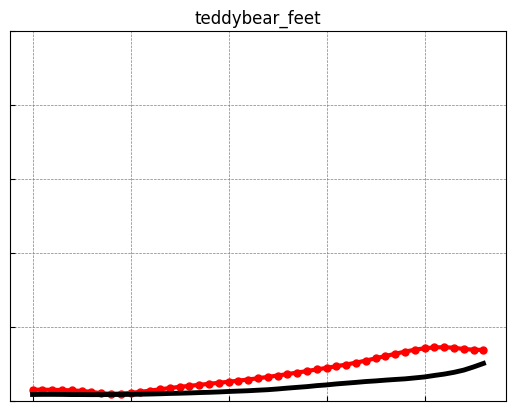

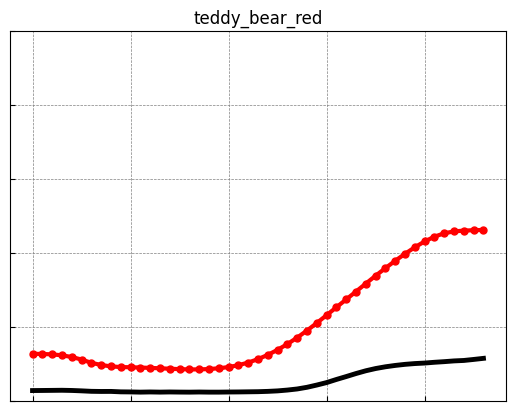

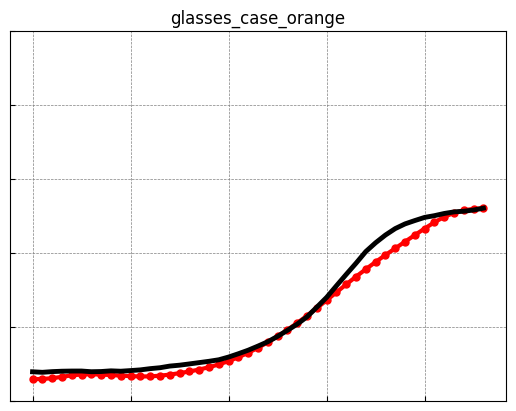

In [82]:
size = 3

# idx = np.array([0,1])

for i in range(len(obj_pts)-1):
# for i in range(2,3):
    fig, ax = plt.subplots()

    # # Tree
    # if i == 0:
    #     plt.ylim([0,1])
    #     opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))

    #     plt.plot(captured_pts_reflectance[i]/(captured_pts_reflectance[i].max()*3.25), label = 'gt', linewidth = 3, color='black')#, plt.title(captured_pts_name[i]) # 6.5
        
    #     # idx = 0
    #     # plt.plot(captured_pts_reflectance[idx]/captured_pts_reflectance[idx].max(), label = 'gt', linewidth = 3, color='orange') #, plt.title(captured_pts_name[idx])

    #     plt.plot(opt_param_plot / (opt_param_plot.max()*2.9), label = 'ours', c= 'red', linewidth = 3)#, plt.title(obj_pts[i])
    
    # else:
    #     plt.ylim([0,1])
    #     opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))

    #     plt.plot(captured_pts_reflectance[i]/(captured_pts_reflectance[i].max()*2), label = 'gt', linewidth = 3, color='black')#, plt.title(captured_pts_name[i]) # 4
        
    #     # idx = 0
    #     # plt.plot(captured_pts_reflectance[idx]/captured_pts_reflectance[idx].max(), label = 'gt', linewidth = 3, color='orange') #, plt.title(captured_pts_name[idx])

    #     plt.plot(opt_param_plot / (opt_param_plot.max()*2), label = 'ours', c= 'red', linewidth = 3)#, plt.title(obj_pts[i])
    
    # # Flower pencil scene
    # if i == 0:
    #     plt.ylim([0,1])
    #     opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
    #     plt.plot(opt_param_plot/2.2, label = 'ours', c= 'red', linewidth = 3, marker = '.', markersize = 10)
    #     plt.plot(captured_pts_reflectance[i], label = 'gt', linewidth =  3.5, color='black'), plt.title(captured_pts_name[i])

    # elif i == 1:
    #     plt.ylim([0,1])
    #     opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
    #     plt.plot(opt_param_plot/1.5, label = 'ours', c= 'red', linewidth = 3, marker = '.', markersize = 10)
    #     plt.plot(captured_pts_reflectance[i], label = 'gt', linewidth =  3.5, color='black'), plt.title(captured_pts_name[i])

    # elif i == 2:
    #     plt.ylim([0,1])
    #     opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
    #     plt.plot(opt_param_plot/1.2, label = 'ours', c= 'red', linewidth = 3, marker = '.', markersize = 10)
    #     plt.plot(captured_pts_reflectance[i], label = 'gt', linewidth = 3.5, color='black'), plt.title(captured_pts_name[i])

    # elif i == 3:    
    #     plt.ylim([0,1])
    #     opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
    #     plt.plot(opt_param_plot, label = 'ours', c= 'red', linewidth = 3, marker = '.', markersize = 10)
    #     plt.plot(captured_pts_reflectance[i]*2.4, label = 'gt', linewidth =  3.5, color='black'), plt.title(captured_pts_name[i])

    # elif i == 4:
    #     plt.ylim([0,1])
    #     opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
    #     plt.plot(opt_param_plot, label = 'ours', c= 'red', linewidth = 3, marker = '.', markersize = 10)
    #     plt.plot(captured_pts_reflectance[i]*2, label = 'gt', linewidth =  3.5, color='black'), plt.title(captured_pts_name[i])

    # else:
    #     plt.ylim([0,1])
    #     opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
    #     plt.plot(opt_param_plot/(1.25), label = 'ours', c= 'red', linewidth = 3, marker = '.', markersize = 10)
    #     plt.plot(captured_pts_reflectance[i]*3, label = 'gt', linewidth =  3.5, color='black'), plt.title(captured_pts_name[i])

    # Teddy bear
    if i == 3:
        plt.ylim([0,1])
        opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
        plt.plot(opt_param_plot, label = 'ours', c= 'red', linewidth = 3, marker = '.', markersize = 10)
        plt.plot(captured_pts_reflectance[i]*2.3, label = 'gt', linewidth = 3.5, color='black'), plt.title(captured_pts_name[i])

    else:
        plt.ylim([0,1])
        opt_param_plot = opt_param[obj_pts[i,1]-size:obj_pts[i,1]+size, obj_pts[i,0]-size:obj_pts[i,0]+size].mean(axis = (0,1))
        plt.plot(opt_param_plot*0.7, label = 'ours', c= 'red', linewidth = 3, marker = '.', markersize = 10)
        plt.plot(captured_pts_reflectance[i], label = 'gt', linewidth = 3.5, color='black'), plt.title(captured_pts_name[i])

    # # green patch
    # plt.ylim([0,1])
    # opt_param_plot = opt_param[292-size:292+size,132-size:132+size].mean(axis = (0,1))
    # plt.plot(ref_CC[:,13], label = 'gt', linewidth = 3.5, color='black')#, plt.title(captured_pts_name[i])
    # plt.plot(opt_param_plot, label = 'ours', c= 'red', linewidth = 3, marker = '.', markersize = 10)

    #  Erasing y-axis and x-axis labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Setting ticks direction to inward
    ax.tick_params(axis='x', direction='in')
    ax.tick_params(axis='y', direction='in')
    # ax.set_facecolor('black')
    # Adding dotted light gray grid lines
    ax.grid(color='gray', linestyle='--', linewidth=0.5)    
    # plt.legend()
    plt.savefig('./teaser.svg')